Remaining Senarios Are :
[3, 21, 49, 67, 81, 110, 130, 146, 169, 191]
Probabilitie are : 
[0.06, 0.115, 0.12, 0.08, 0.105, 0.12, 0.095, 0.095, 0.11, 0.1]
objective function value is:  -4.547890784929277


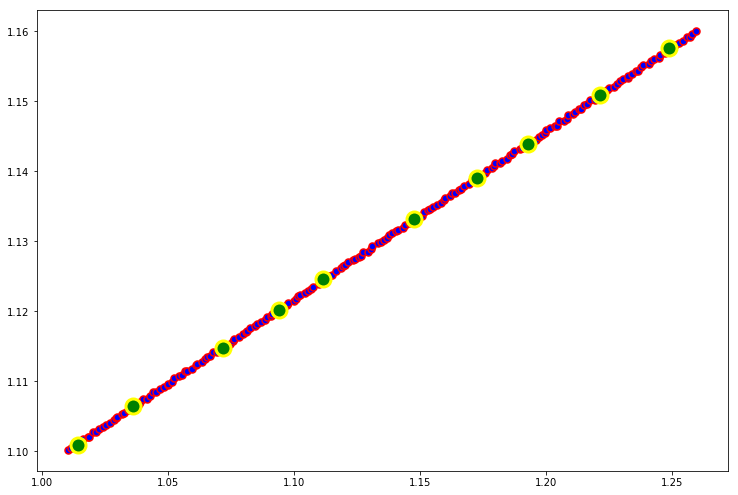

In [5]:
import pulp
import numpy as np
import matplotlib.pyplot as plt
from math import *
from pulp import *

# Senario Production
epsilon1min=1.01
epsilon1max=1.26
epsilon2min=1.10
epsilon2max=1.16
NumberOfDiscreteSenarios=200
a=(epsilon1max-epsilon1min)/NumberOfDiscreteSenarios
b=(epsilon2max-epsilon2min)/NumberOfDiscreteSenarios
probabilities=[1/NumberOfDiscreteSenarios for i in range(NumberOfDiscreteSenarios)]
AllSenarios=[]
for i in range(1,NumberOfDiscreteSenarios+1):
    AllSenarios.append([np.round(np.random.uniform(1.01+(i-1)*a,1.01+(i)*a) , 4),np.round(np.random.uniform(1.10+(i-1)*b,1.10+(i)*b),4)])

# Senario Reduction
def calc_dist(p1,p2):
    return sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
RemainingSenarios=[i for i in range(NumberOfDiscreteSenarios)]
MinDist=[]
for i in range(NumberOfDiscreteSenarios):
    d=[]
    for j in range(NumberOfDiscreteSenarios):
        if i!=j:
            d.append(calc_dist(AllSenarios[i],AllSenarios[j]))
    MinDist.append(d)
first_reduction=MinDist.index(min(MinDist))

RemainingSenarios.remove(first_reduction)
J=[first_reduction]
BigM=1000000
C=[BigM for i in range(NumberOfDiscreteSenarios)]
epsilon=1.50
iterr=0
d=
while True:
    for i in RemainingSenarios:
        for j in RemainingSenarios:
            if i != j:
                d.append(calc_dist(AllSenarios[i],AllSenarios[j]))
        f=[min(d)]
        d=[]
        for k in J:
            for l in RemainingSenarios:
                if l !=i:
                    d.append(calc_dist(AllSenarios[k],AllSenarios[l]))
                   
            f.append(min(d))
            d=[]
        C[i]=sum(f)
    if min(C) < epsilon:
        RemovedSenario=C.index(min(C))
        J.append(RemovedSenario)
        RemainingSenarios.remove(RemovedSenario)
        iterr=iterr+1
        
        C=[BigM for i in range(NumberOfDiscreteSenarios)]
    else:
        break
print('Remaining Senarios Are :')
print(RemainingSenarios)
h=[]
v=[]
for i in range(len(AllSenarios)):
    h.append(AllSenarios[i][0])
    v.append(AllSenarios[i][1])
se_h=[]
se_v=[]
for i in RemainingSenarios:
    se_h.append(AllSenarios[i][0])
    se_v.append(AllSenarios[i][1])

fig=plt.figure()
ax=fig.add_axes([0,0,1.6,1.6])
ax.plot(h,v,linestyle='',color='blue',marker='o',markersize=7,markeredgewidth=1.5,markeredgecolor='red')
ax.plot(se_h,se_v,linestyle='',color='green',marker='o',markersize=15,markeredgewidth=3,markeredgecolor='yellow')
# Assign removed senarios to remaining senarios
assign=[[] for i in range(len(RemainingSenarios))]
for i in J:
    d=[]
    for j in RemainingSenarios:
        d.append(calc_dist(AllSenarios[i],AllSenarios[j]))
    cluster=d.index(min(d))
    assign[cluster].append(i)

# Calculate each senario probability
p_cluster= []
for i in range(len(RemainingSenarios)):
    p=[]
    for j in assign[i]:
        p.append(probabilities[j])
    p.append(probabilities[i])
    p_cluster.append(np.round(sum(p),4))
print('Probabilitie are : ')
print(p_cluster)

# Solve the model with remaining senarios
# Variables Definition
x1 = LpVariable.dicts('x1',[(i)for i in range(1,3)] ,lowBound=0 , cat='Continuous')
x2 = LpVariable.dicts('x2',[(i,s1)for i in range(1,3) for s1 in range(1,len(RemainingSenarios)+1)] , lowBound=0 , cat='Continuous')
x3 = LpVariable.dicts('x3',[(i,s1,s2)for i in range(1,3) for s1 in range(1,len(RemainingSenarios)+1) for s2 in range(1,len(RemainingSenarios)+1)] , lowBound=0 , cat='Continuous')
y = LpVariable.dicts('y',[(s1,s2,s3)for s1 in range(1,len(RemainingSenarios)+1) for s2 in range(1,len(RemainingSenarios)+1) for s3 in range(1,len(RemainingSenarios)+1)] , lowBound=0 , cat='Continuous')
w = LpVariable.dicts('w',[(s1,s2,s3)for s1 in range(1,len(RemainingSenarios)+1) for s2 in range(1,len(RemainingSenarios)+1) for s3 in range(1,len(RemainingSenarios)+1)] , lowBound=0 , cat='Continuous')
# Mathematical Model Definition
financial_model = LpProblem("Financial Planning Problem",sense=-1)
# Objective Function Definition
financial_model += lpSum(np.round(p_cluster[s1-1],4)*np.round(p_cluster[s2-1],4)*np.round(p_cluster[s3-1],4)*(y[(s1,s2,s3)]-4*w[(s1,s2,s3)])for s1 in range(1,len(RemainingSenarios)+1) for s2 in range(1,len(RemainingSenarios)+1) for s3 in range(1,len(RemainingSenarios)+1))
# Constraints Definition
financial_model += lpSum(x1[(i)]for i in range(1,3)) == 55

for s1 in range(1,len(RemainingSenarios)+1):
    financial_model += lpSum(np.round(AllSenarios[RemainingSenarios[s1-1]][i-1],4)*x1[(i)]for i in range(1,3)) == lpSum(x2[(i,s1)]for i in range(1,3))   
for s1 in range(1,len(RemainingSenarios)+1):
    for s2 in range(1,len(RemainingSenarios)+1):
        financial_model += lpSum(np.round(AllSenarios[RemainingSenarios[s2-1]][i-1],4)*x2[(i,s1)]for i in range(1,3)) == lpSum(x3[(i,s1,s2)]for i in range(1,3))      
for s1 in range(1,len(RemainingSenarios)+1):
    for s2 in range(1,len(RemainingSenarios)+1):
        for s3 in range(1,len(RemainingSenarios)+1):
            financial_model += lpSum(np.round(AllSenarios[RemainingSenarios[s3-1]][i-1],2)*x3[(i,s1,s2)]for i in range(1,3)) - y[(s1,s2,s3)] + w[(s1,s2,s3)] == 80
# Solve The Model
status=financial_model.solve()
print('objective function value is: ', financial_model.objective.value())
